In [1]:
import cv2
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib.image as mpimg
import matplotlib as mpl
#mpl.rcParams['figure.dpi'] = 300
import pywt
import pywt.data
import numpy as np
from math import sqrt
from PIL import Image, ImageChops, ImageOps
import pickle

In [2]:
!wget https://courses.openedu.ru/assets/courseware/v1/9a13f7fca432325ef80cc5936b0bd39a/asset-v1:ITMOUniversity+IMAGPROC+fall_2023_ITMO_bac+type@asset+block/rune-haugseng-UCzjZPCGV1Y-unsplash.jpg

--2023-09-12 17:36:41--  https://courses.openedu.ru/assets/courseware/v1/9a13f7fca432325ef80cc5936b0bd39a/asset-v1:ITMOUniversity+IMAGPROC+fall_2023_ITMO_bac+type@asset+block/rune-haugseng-UCzjZPCGV1Y-unsplash.jpg
Resolving courses.openedu.ru (courses.openedu.ru)... 178.248.235.109
Connecting to courses.openedu.ru (courses.openedu.ru)|178.248.235.109|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8867776 (8.5M) [image/jpeg]
Saving to: ‘rune-haugseng-UCzjZPCGV1Y-unsplash.jpg’

rune-haugseng-UCzjZ 100%[===================>]   8.46M  7.97MB/s    in 1.1s    

2023-09-12 17:36:43 (7.97 MB/s) - ‘rune-haugseng-UCzjZPCGV1Y-unsplash.jpg’ saved [8867776/8867776]



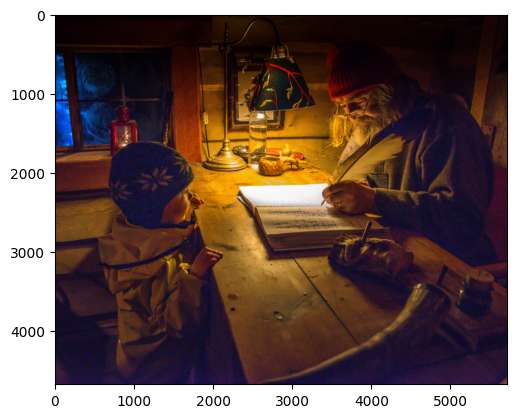

In [3]:
file_name = 'rune-haugseng-UCzjZPCGV1Y-unsplash.jpg'
img = cv2.imread(file_name)
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(RGB_img)
plt.show()

In [4]:
ratio = img.shape[1]/img.shape[0]

In [5]:
ratio

1.2236729452054795

In [6]:
new_width = 2858

In [8]:
dim = (new_width, int(new_width / ratio))

In [9]:
dim

(2858, 2335)

In [10]:
resized_RGB_img = cv2.resize(RGB_img, dim, interpolation = cv2.INTER_AREA)

In [22]:
def get_h_n (img):
  n, h = np.unique (img.ravel(), return_counts= True)
  return max(h)/len(img.ravel()), n[h.argmax()]

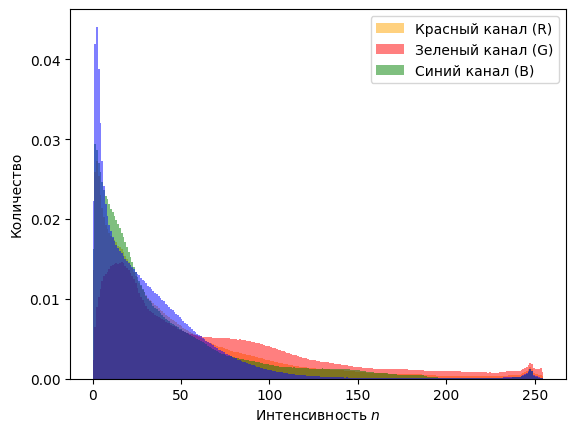

In [23]:
plt.hist(resized_RGB_img.ravel(), bins = 256, color = 'orange', alpha = 0.5, density=True)
plt.hist(resized_RGB_img[:, :, 0].ravel(), bins = 256, color = 'Red', alpha = 0.5, density=True)
plt.hist(resized_RGB_img[:, :, 1].ravel(), bins = 256, color = 'Green', alpha = 0.5, density=True)
plt.hist(resized_RGB_img[:, :, 2].ravel(), bins = 256, color = 'Blue', alpha = 0.5, density=True)
plt.legend(['Красный канал (R)', 'Зеленый канал (G)', 'Cиний канал (B)'])
plt.xlabel('Интенсивность $n$')
plt.ylabel('Количество')
plt.show()

In [24]:
print (f'{get_h_n (resized_RGB_img[:, :, 0])} красный')
print (f'{get_h_n (resized_RGB_img[:, :, 1])} зеленый')
print (f'{get_h_n (resized_RGB_img[:, :, 2])} синий')
print (f'{get_h_n (resized_RGB_img)} все')

(0.014528960369704934, 16) красный
(0.02932450029445128, 1) зеленый
(0.043916996207347646, 2) синий
(0.027144312095379236, 2) все


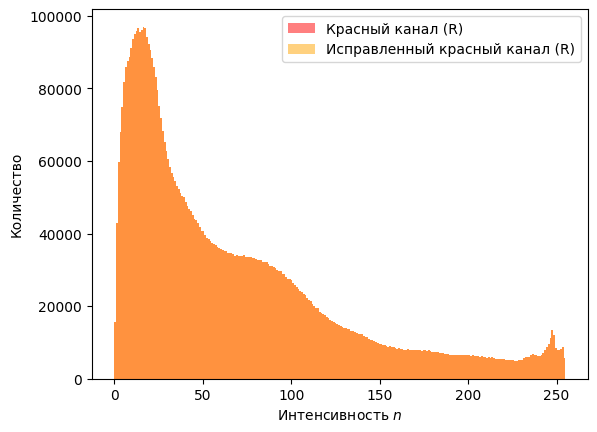

In [25]:
RGB_img_new = resized_RGB_img.copy()
RGB_img_new[:, :, 0] = (resized_RGB_img[:, :, 0] - np.min(resized_RGB_img[:, :, 0]))/(np.max(resized_RGB_img[:, :, 0]) - np.min(resized_RGB_img[:, :, 0]))*255
plt.hist(resized_RGB_img[:, :, 0].ravel(), bins = 256, color = 'Red', alpha = 0.5)
plt.hist(RGB_img_new[:, :, 0].ravel(), bins = 256, color = 'Orange', alpha = 0.5)
plt.xlabel('Интенсивность $n$')
plt.ylabel('Количество')
plt.legend(['Красный канал (R)', 'Исправленный красный канал (R)'])
plt.show()


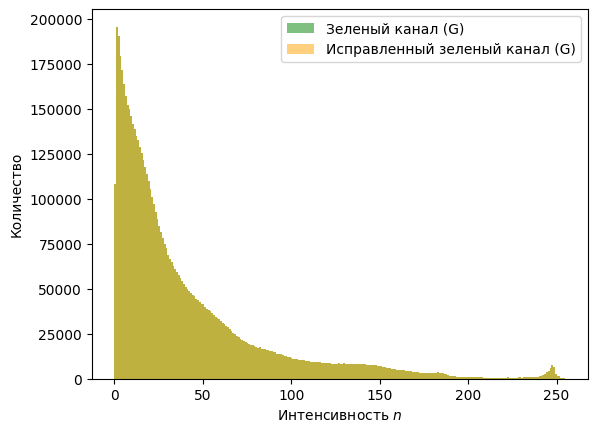

In [26]:
RGB_img_new[:, :, 1] = (resized_RGB_img[:, :, 1] - np.min(resized_RGB_img[:, :, 1]))/(np.max(resized_RGB_img[:, :, 1]) - np.min(resized_RGB_img[:, :, 1]))*255
plt.hist(resized_RGB_img[:, :, 1].ravel(), bins = 256, color = 'Green', alpha = 0.5)
plt.hist(RGB_img_new[:, :, 1].ravel(), bins = 256, color = 'Orange', alpha = 0.5)
plt.xlabel('Интенсивность $n$')
plt.ylabel('Количество')
plt.legend(['Зеленый канал (G)', 'Исправленный зеленый канал (G)'])
plt.show()

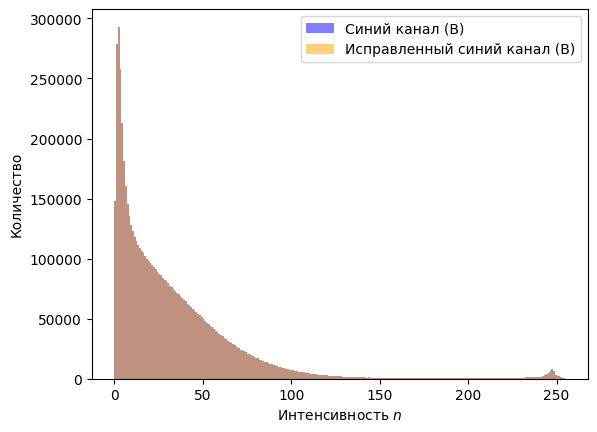

In [27]:
RGB_img_new[:, :, 2] = (resized_RGB_img[:, :, 2] - np.min(resized_RGB_img[:, :, 2]))/(np.max(resized_RGB_img[:, :, 2]) - np.min(resized_RGB_img[:, :, 2]))*255
plt.hist(resized_RGB_img[:, :, 2].ravel(), bins = 256, color = 'Blue', alpha = 0.5)
plt.hist(RGB_img_new[:, :, 2].ravel(), bins = 256, color = 'Orange', alpha = 0.5)
plt.xlabel('Интенсивность $n$')
plt.ylabel('Количество')
plt.legend(['Синий канал (B)', 'Исправленный синий канал (B)'])
plt.show()

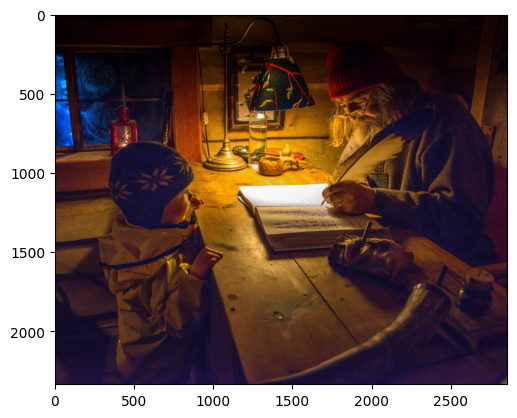

In [28]:
plt.imshow(RGB_img_new)

In [29]:
RGB_img_new[1196, 1464]

array([222, 222, 222], dtype=uint8)